### Problem Statement

The Insurance company that provides health insurance to its customers are now planning to provide vehicle insurance. The company wants to know how many of its customers would be interested in vehicle insurance. 

## Proposed Plan

<b>1. EDA:</b> <br>
	Perform EDA to extract valuable insights from the data. 

<b>Feature Engineering:</b> <br>
	Perform feature engineering to check which columns play a very important role in model building and try to come up with new features which makes a difference in building the model. 

<b>Modelling:</b> <br>
	Build a model to come up with a probability score which tells the chances of a person opting for vehicle insurance

In [2]:
## Importing libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Loading the dataset
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

In [5]:
train_df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [6]:
test_df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,381110,Male,25,1,11.0,1,< 1 Year,No,35786.0,152.0,53
1,381111,Male,40,1,28.0,0,1-2 Year,Yes,33762.0,7.0,111
2,381112,Male,47,1,28.0,0,1-2 Year,Yes,40050.0,124.0,199
3,381113,Male,24,1,27.0,1,< 1 Year,Yes,37356.0,152.0,187
4,381114,Male,27,1,28.0,1,< 1 Year,No,59097.0,152.0,297


### EDA

In [11]:
## Checking the number of features and instances
train_df.shape

(381109, 12)

In [14]:
## Check for missing values
train_df.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

We can infer from above that there are no missing values. 

In [15]:
## Looking at columns
train_df.columns

Index(['id', 'Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response'],
      dtype='object')

In [17]:
print(train_df["Region_Code"].unique())
print(train_df["Policy_Sales_Channel"].unique())

[28.  3. 11. 41. 33.  6. 35. 50. 15. 45.  8. 36. 30. 26. 16. 47. 48. 19.
 39. 23. 37.  5. 17.  2.  7. 29. 46. 27. 25. 13. 18. 20. 49. 22. 44.  0.
  9. 31. 12. 34. 21. 10. 14. 38. 24. 40. 43. 32.  4. 51. 42.  1. 52.]
[ 26. 152. 160. 124.  14.  13.  30. 156. 163. 157. 122.  19.  22.  15.
 154.  16.  52. 155.  11. 151. 125.  25.  61.   1.  86.  31. 150.  23.
  60.  21. 121.   3. 139.  12.  29.  55.   7.  47. 127. 153.  78. 158.
  89.  32.   8.  10. 120.  65.   4.  42.  83. 136.  24.  18.  56.  48.
 106.  54.  93. 116.  91.  45.   9. 145. 147.  44. 109.  37. 140. 107.
 128. 131. 114. 118. 159. 119. 105. 135.  62. 138. 129.  88.  92. 111.
 113.  73.  36.  28.  35.  59.  53. 148. 133. 108.  64.  39.  94. 132.
  46.  81. 103.  90.  51.  27. 146.  63.  96.  40.  66. 100.  95. 123.
  98.  75.  69. 130. 134.  49.  97.  38.  17. 110.  80.  71. 117.  58.
  20.  76. 104.  87.  84. 137. 126.  68.  67. 101. 115.  57.  82.  79.
 112.  99.  70.   2.  34.  33.  74. 102. 149.  43.   6.  50. 144. 143.
  4

In [18]:
## Segregating columns
numerical_columns = ["Age","Region_Code", "Annual_Premium", "Policy_Sales_Channel", "Vintage"]
categorical_columns = ["Gender","Driving_License", 'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage']

In [19]:
train_df[numerical_columns].describe()

,Age,Region_Code,Annual_Premium,Policy_Sales_Channel,Vintage
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,38.822584,26.388807,30564.389581,112.034295,154.347397
std,15.511611,13.229888,17213.155057,54.203995,83.671304
min,20.000000,0.000000,2630.000000,1.000000,10.000000
25%,25.000000,15.000000,24405.000000,29.000000,82.000000
50%,36.000000,28.000000,31669.000000,133.000000,154.000000
75%,49.000000,35.000000,39400.000000,152.000000,227.000000
max,85.000000,52.000000,540165.000000,163.000000,299.000000


<AxesSubplot:xlabel='Response', ylabel='count'>

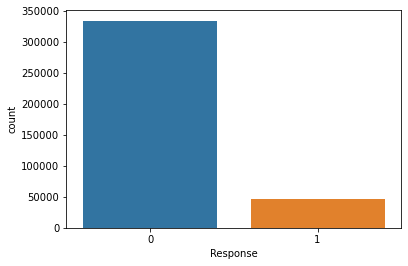

In [23]:
### Checking if the data is skewed. 
sns.countplot(x = train_df["Response"])

From the above plot we can see that the data is skewed. Going forward, we need to implement techniques like random sampling or SMOT analysis to fix this issue. 

<AxesSubplot:xlabel='Gender', ylabel='count'>

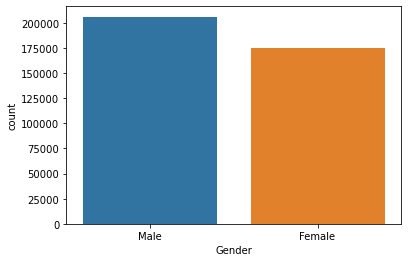

In [25]:
### Gender participation
sns.countplot(x = train_df["Gender"])

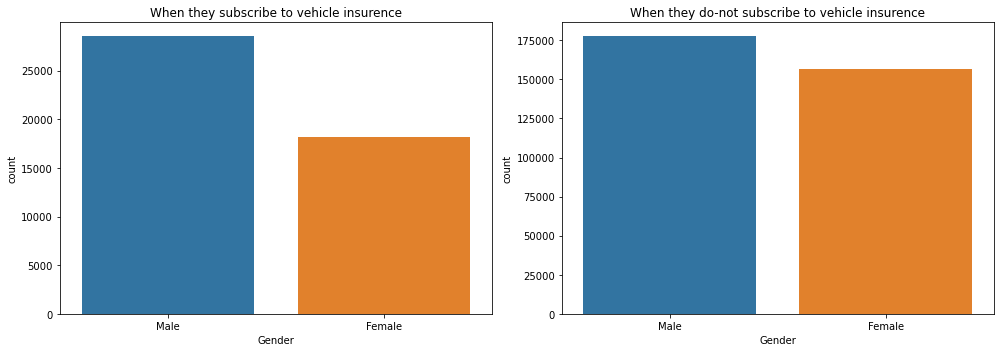

In [33]:
### Gender distribution based on response
fig, axis = plt.subplots(1, 2, figsize = (14, 5))

sns.countplot(ax = axis[0], x = train_df[train_df["Response"] == 1]["Gender"])
axis[0].set_title("When they subscribe to vehicle insurence")

sns.countplot(ax = axis[1], x = train_df[train_df["Response"] == 0]["Gender"])
axis[1].set_title("When they do-not subscribe to vehicle insurence")

fig.tight_layout()

From the above we can see that Male tend to subscribe to vehicle insurence more than female. Therefore we can assume that gender plays an important role in model building. 

In [ ]:
### Analysing Driving liscense
